In [1]:
using Plots
using Statistics
using Random

## Ambiente K-Armed Bandits

In [2]:
# Bandit arm definition
mutable struct BanditArm
    true_mean::Float64
    estimated_mean::Float64
    num_pulls::Int
end

BanditArm(true_mean) = BanditArm(true_mean, 0.0, 0)

# Function to pull a bandit arm
function pull_arm(arm::BanditArm)
    reward = arm.true_mean + randn()  # Gaussian noise with σ=1
    arm.num_pulls += 1
    # Update estimated mean using sample-average method
    arm.estimated_mean = arm.estimated_mean + (reward - arm.estimated_mean) / arm.num_pulls
    return reward
end

# Epsilon-greedy action selection
function select_arm(bandits::Vector{BanditArm}, ϵ::Float64)
    if rand() < ϵ
        # Exploration: choose random arm
        return rand(1:length(bandits))
    else
        # Exploitation: choose arm with highest estimated mean
        estimated_means = [arm.estimated_mean for arm in bandits]
        return argmax(estimated_means)
    end
end

# Run a single k-armed bandit experiment
function run_bandit_experiment(k::Int, steps::Int, ϵ::Float64, opt::Int = 0)
    # Initialize bandit arms with random true means (from normal distribution with μ=0, σ=1)
    bandits = [BanditArm(randn()) for _ in 1:k]
    if opt != 0
        for arm in bandits
            arm.estimated_mean = opt
        end
    end  
    optimal_arm = argmax([arm.true_mean for arm in bandits])
    
    rewards = zeros(steps)
    optimal_actions = zeros(steps)
    
    for step in 1:steps
        chosen_arm = select_arm(bandits, ϵ)
        reward = pull_arm(bandits[chosen_arm])
        rewards[step] = reward
        optimal_actions[step] = (chosen_arm == optimal_arm) ? 1 : 0
    end
    
    return rewards, optimal_actions
end

# Run multiple experiments and average results
function run_multiple_experiments(k::Int, steps::Int, ϵ::Float64, num_experiments::Int, opt::Int = 0)
    all_rewards = zeros(steps)
    all_optimal = zeros(steps)
    
    for exp in 1:num_experiments
        rewards, optimal = run_bandit_experiment(k, steps, ϵ, opt)
        all_rewards .+= rewards 
        all_optimal .+= optimal
    end
    
    return all_rewards ./ num_experiments, all_optimal ./ num_experiments
end

run_multiple_experiments (generic function with 2 methods)

## Greedy (Without optimistic initialization)

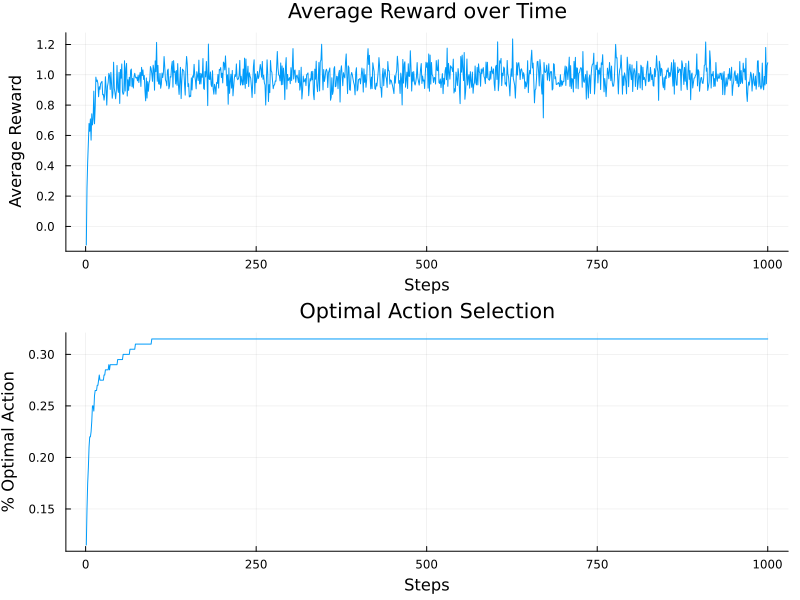

In [3]:
# Parameters
k = 10                 # Number of arms
steps = 1000           # Number of time steps
ϵ = 0.0                # Epsilon for epsilon-greedy
num_experiments = 200  # Number of experiments to average over

# Run experiments
avg_rewards, avg_optimal = run_multiple_experiments(k, steps, ϵ, num_experiments)

# Plot results
p1 = plot(avg_rewards, xlabel="Steps", ylabel="Average Reward", 
          title="Average Reward over Time", legend=false)
p2 = plot(avg_optimal, xlabel="Steps", ylabel="% Optimal Action", 
          title="Optimal Action Selection", legend=false)

plot(p1, p2, layout=(2,1), size=(800,600))

## Greedy (With optimistic initialization)

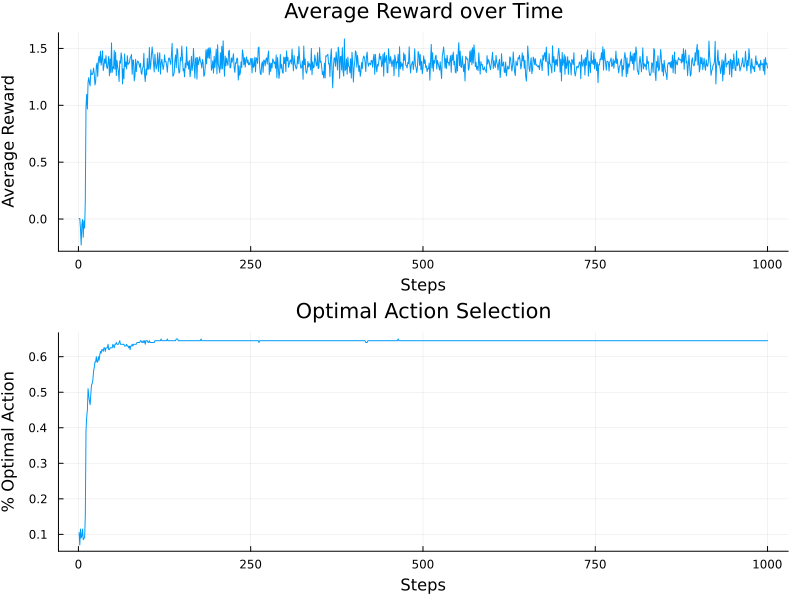

In [4]:
# Parameters
k = 10                 # Number of arms
steps = 1000           # Number of time steps
ϵ = 0.0                # Epsilon for epsilon-greedy
num_experiments = 200  # Number of experiments to average over
opt = 5                # Arbitrary value for optimistic initialization 

# Run experiments
avg_rewards, avg_optimal = run_multiple_experiments(k, steps, ϵ, num_experiments, opt)

# Plot results
p1 = plot(avg_rewards, xlabel="Steps", ylabel="Average Reward", 
          title="Average Reward over Time", legend=false)
p2 = plot(avg_optimal, xlabel="Steps", ylabel="% Optimal Action", 
          title="Optimal Action Selection", legend=false)

plot(p1, p2, layout=(2,1), size=(800,600))

## ϵ-Greedy (ϵ = 0.1)

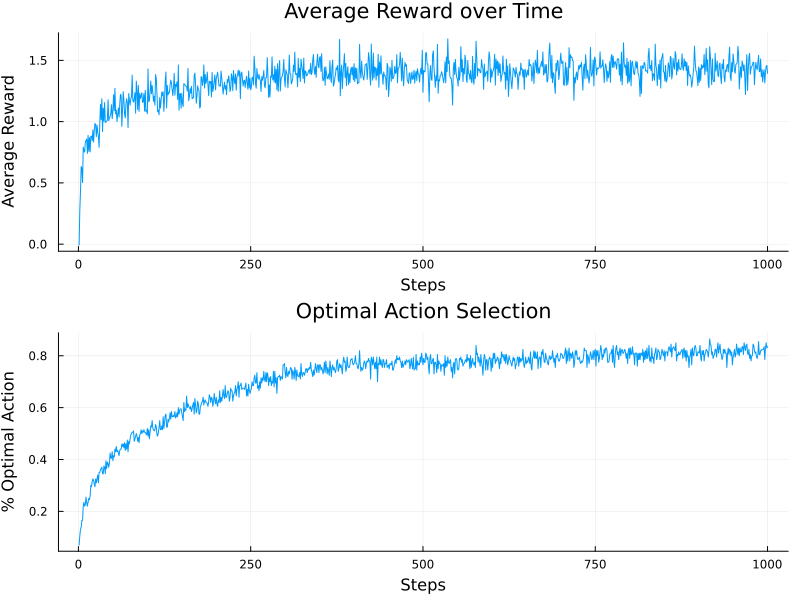

In [5]:
# Parameters
k = 10                 # Number of arms
steps = 1000           # Number of time steps
ϵ = 0.1                # Epsilon for epsilon-greedy
num_experiments = 200  # Number of experiments to average over

# Run experiments
avg_rewards, avg_optimal = run_multiple_experiments(k, steps, ϵ, num_experiments)

# Plot results
p1 = plot(avg_rewards, xlabel="Steps", ylabel="Average Reward", 
          title="Average Reward over Time", legend=false)
p2 = plot(avg_optimal, xlabel="Steps", ylabel="% Optimal Action", 
          title="Optimal Action Selection", legend=false)

plot(p1, p2, layout=(2,1), size=(800,600))

In [ ]:
function ucb(bandits::Vector{BanditArm}, step::Int, c::Float64)
    estimated_returns = [arm.estimated_mean + c*sqrt(log(step)/arm.num_pulls) for arm in bandits]
    return argmax(estimated_returns)
end

# Run a single k-armed bandit experiment
function run_bandit_experiment_ucb(k::Int, steps::Int, c::Float64)
    # Initialize bandit arms with random true means (from normal distribution with μ=0, σ=1)
    bandits = [BanditArm(randn()) for _ in 1:k]
    optimal_arm = argmax([arm.true_mean for arm in bandits])
    
    rewards = zeros(steps)
    optimal_actions = zeros(steps)
    
    for step in 1:steps
        chosen_arm = ucb(bandits, step, c)
        reward = pull_arm(bandits[chosen_arm])
        rewards[step] = reward
        optimal_actions[step] = (chosen_arm == optimal_arm) ? 1 : 0
    end
    
    return rewards, optimal_actions
end

# Run multiple experiments and average results
function run_multiple_experiments_ucb(k::Int, steps::Int, c::Float64, num_experiments::Int)
    all_rewards = zeros(steps)
    all_optimal = zeros(steps)
    
    for exp in 1:num_experiments
        rewards, optimal = run_bandit_experiment_ucb(k, steps, c)
        all_rewards .+= rewards 
        all_optimal .+= optimal
    end
    
    return all_rewards ./ num_experiments, all_optimal ./ num_experiments
end

## Upper Bound Confidence (UBC)

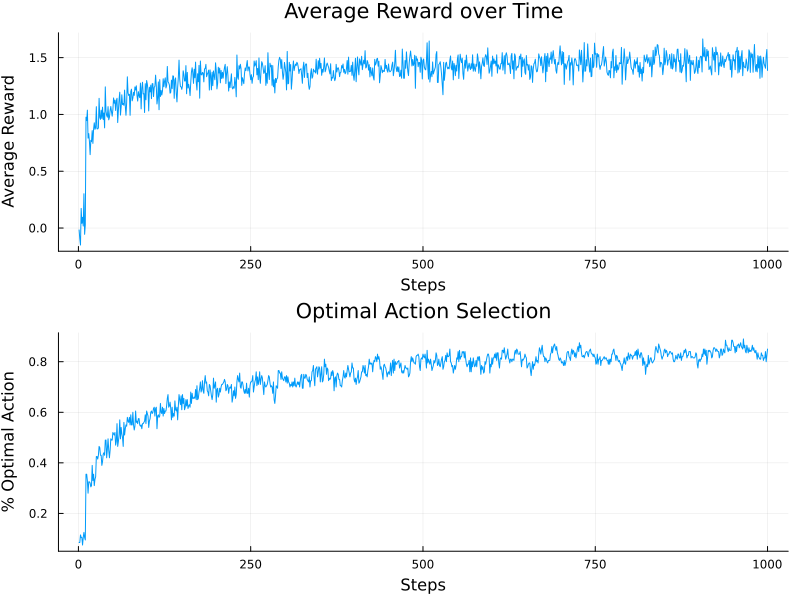

In [12]:
# Parameters
k = 10                 # Number of arms
steps = 1000           # Number of time steps
c = 2.0                # c > 0 controls the degree of exploration
num_experiments = 200  # Number of experiments to average over

# Run experiments
avg_rewards, avg_optimal = run_multiple_experiments_ucb(k, steps, c, num_experiments)

# Plot results
p1 = plot(avg_rewards, xlabel="Steps", ylabel="Average Reward", 
          title="Average Reward over Time", legend=false)
p2 = plot(avg_optimal, xlabel="Steps", ylabel="% Optimal Action", 
          title="Optimal Action Selection", legend=false)

plot(p1, p2, layout=(2,1), size=(800,600))